# Libraries and Functions

The following cell contains the libraries and functions required to make this example implementation work.

**Libraries**
|Library|Required|
|---|---|
|matplotlib|NO|
|KMeans|YES|
|random|NO|

**Functions**
|Functions|Required|
|---|---|
|Generate_Random_Vectors|NO|
|Generate_Random_Color|NO|

In [2]:
# Install packages
%pip install -U ipykernel matplotlib

# Import libraries
from matplotlib import pyplot as plt # Import matplotlib for visualization
from KMeans import K_Means # Import the K-Means model
from random import choice, randint # Used for this example, but not required

# Functions
def Generate_Random_Vectors(vectorCount: int, dimensionCount: int = 2, minValue: int = -10, maxValue: int = 10) -> list[list[int]]:
    """
    Generate a matrix of vectors with random values.

    Parameters:
        vectorCount (int): The number of vectors to generate.
        dimensionCount (int): The number of dimensions in each vector. Defaults to 2.
        minValue (int): The minimum random value. Defaults to -10.
        maxValue (int): The maximum random value. Defaults to 10.

    Returns:
        list[list[int]]: A matrix of vectors with random values.
    """

    matrix: list[list[int]] = []

    for i in range(vectorCount):
        vector: list[int] = []

        for j in range(dimensionCount):
            vector.append(randint(minValue, maxValue))

        matrix.append(vector)

    return matrix

def Generate_Random_Color() -> str:
    """
    Generate a random color.

    Returns:
        str: A random color.
    """
    characters = '0123456789ABCDEF'

    return '#' + ''.join([choice(characters) for _ in range(6)])

# Graphing

The following cell initializes a K-Means clustering model with 3 clusters, trains it on 500 random 3D vectors, and then visualizes the resulting clusters in a 3D plot. It also prints out statistics for each cluster, including its centroid and number of elements. Unassigned vectors are plotted in black.

Epochs: 11

Cluster: cluster_0
Centroid: [0.5, -1.5, 6.6667]
Elements: 12

Cluster: cluster_1
Centroid: [-4.2222, -3.1111, 1.1111]
Elements: 9

Cluster: cluster_2
Centroid: [-2.0, 3.5, 9.2]
Elements: 10


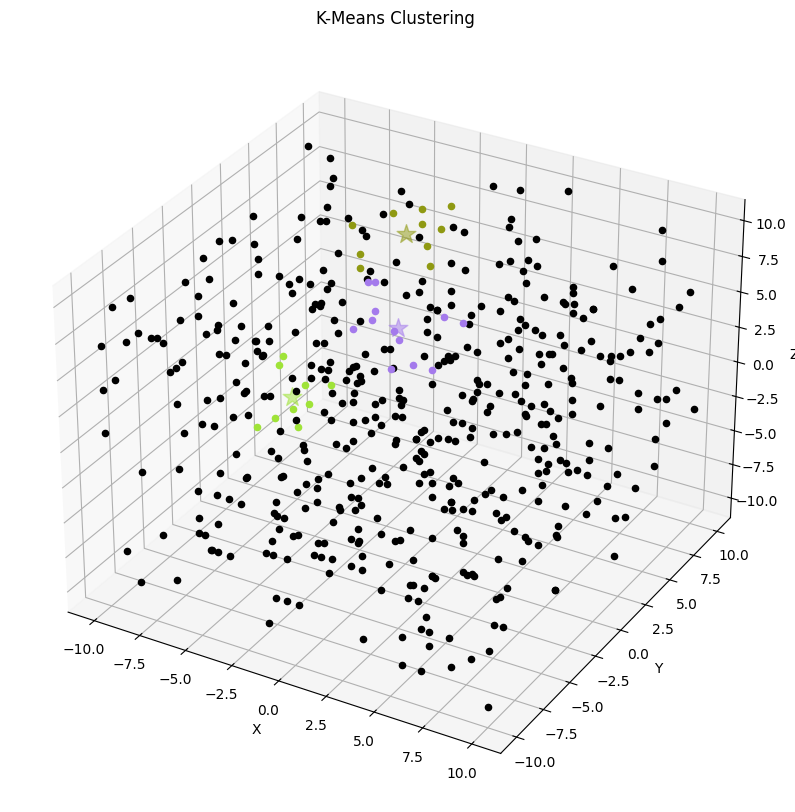

In [88]:
# Initialize the model
model = K_Means(
    trainingMatrix=Generate_Random_Vectors(
        vectorCount=500,
        dimensionCount=3,
    ),
    kGroups=3,
    threshold=0.1,
    maxEpochs=100
)

# Display Training Time
print(f"Epochs: {model.epoch}")

# Prepare for visualization
figure = plt.figure(figsize=(10,10))
axis = figure.add_subplot(projection='3d')
axis.set_xlabel('X')
axis.set_ylabel('Y')
axis.set_zlabel('Z')
axis.set_title('K-Means Clustering')

# Plot Clusters
for cluster in model.clusters:
    clusterColor: str = Generate_Random_Color()

    # Display cluster stats
    print(f"\nCluster: {cluster.name}")
    print(f"Centroid: {cluster.centroid}")
    print(f"Elements: {len(cluster.vectors)}")
    
    # Plot the centroid, marked with a star
    axis.scatter(
        cluster.centroid[0], cluster.centroid[1], cluster.centroid[2],
        c=clusterColor, s=200, marker='*', alpha=0.5)

    # Plot the vectors
    for vector in cluster.vectors:
        axis.scatter(
            vector[0], vector[1], vector[2],
            c=clusterColor)

# Plot Unassigned Vectors
for vector in model.unassignedVectors:
    axis.scatter(
        vector[0], vector[1], vector[2], 
        c='black')

# Show the plot
plt.show()

# Fine Tunining

The following cell initializes a K-Means clustering model with 3 clusters, trains it on a set of 500 random 4-dimensional vectors, and then fine-tunes the model by adding an additional cluster and retraining it. The model's performance is printed before and after fine-tuning, including the number of epochs, vectors in each cluster, and unassigned vectors.

In [83]:
# Initialize the model
model = K_Means(
    trainingMatrix=Generate_Random_Vectors(
        vectorCount=500,
        dimensionCount=4,
    ),
    kGroups=3,
    threshold=0.1,
    maxEpochs=100
)

# Print the results
print("Before Fine Tuning:")
print(f"Epochs: {model.epoch}")
for cluster in model.clusters:
    print(f"{cluster.name}: {len(cluster.vectors)} vectors")
print(f"{len(model.unassignedVectors)} unassigned vectors")

# Fine tune and retrain the model
model.Fine_Tune(
    kGroups=4, # One additional cluster
    threshold=0.2, # Weaker threshold
    maxEpochs=100
)

# Print the results
print("\nAfter Fine Tuning:")
print(f"Epochs: {model.epoch}")
for cluster in model.clusters:
    print(f"{cluster.name}: {len(cluster.vectors)} vectors")
print(f"{len(model.unassignedVectors)} unassigned vectors")

Before Fine Tuning:
Epochs: 2
cluster_0: 2 vectors
cluster_1: 1 vectors
cluster_2: 3 vectors
494 unassigned vectors

After Fine Tuning:
Epochs: 9
cluster_0: 36 vectors
cluster_1: 37 vectors
cluster_2: 43 vectors
cluster_3: 43 vectors
341 unassigned vectors


# Cluster Predictions

The following cell initializes a K-Means model with 3 clusters and trains it on 500 random 3D vectors. It then makes two predictions:

1. For a new, random 3D vector.
2. For a vector chosen from an existing cluster.

The code prints the cluster name, centroid, and number of elements in the cluster for each prediction, or a message if no nearby cluster is found.

In [71]:
# Initialize the model
model = K_Means(
    trainingMatrix=Generate_Random_Vectors(
        vectorCount=500,
        dimensionCount=3,
    ),
    kGroups=3,
    threshold=0.1,
    maxEpochs=100
)

# Make a prediction for a random vector
vector, cluster = model.Predict(vector=Generate_Random_Vectors(vectorCount=1, dimensionCount=3)[0])

if cluster is not None:
    print(f"Cluster: {cluster.name}")
    print(f"Centroid: {cluster.centroid}")
    print(f"Elements: {len(cluster.vectors)}")
else:
    print(f"No nearby clusters for {vector}")

print()

# Make a prediction for a known vector
vector, cluster = model.Predict(vector=choice(model.clusters[0].vectors))

if cluster is not None:
    print(f"Cluster: {cluster.name}")
    print(f"Centroid: {cluster.centroid}")
    print(f"Elements: {len(cluster.vectors)}")
else:
    print(f"No nearby clusters for {vector}")

No nearby clusters for [1, -8, -7]

Cluster: cluster_0
Centroid: [-0.0833, 8.25, 1.1667]
Elements: 12
